PYTHON 13. Визуализация данных

In [46]:
# Импортируем библиотеки

import pandas as pd

In [47]:
# Датасет №1 и №2:

covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [48]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - \
    covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
#3.1
display(covid_data.sort_values(by='date')) #2020-01-22-2021-05-29
#3.2
display(vaccinations_data.sort_values(by='date'))
#3.3
covid_df = covid_data.merge(vaccinations_data, \
    on=['date', 'country'], how='left')
display(covid_df)
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recover_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100
display(covid_df['death_rate'].value_counts(), covid_df['recover_rate'].value_counts())
#3.4
display('Максимальный процент смертности в США за весь период:', \
    round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)) #7.19
#3.5
display('Средний процент выздоровлений в России за весь период:', \
    round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)) #67.06

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
4056,2020-01-22,Japan,2.0,0.0,0.0,2.0,NaN,NaN,NaN
4055,2020-01-22,Hong Kong,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4054,2020-01-22,China,547.0,17.0,28.0,502.0,NaN,NaN,NaN
4061,2020-01-22,Thailand,4.0,0.0,2.0,2.0,NaN,NaN,NaN
4060,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45506,2021-05-29,Serbia,712046.0,6844.0,0.0,705202.0,274.0,10.0,0.0
45490,2021-05-29,Peru,1947555.0,68978.0,1897522.0,-18945.0,5501.0,162.0,4728.0
45433,2021-05-29,Iran,2893218.0,79741.0,2425033.0,388444.0,7107.0,173.0,14781.0
45523,2021-05-29,Syria,24440.0,1763.0,21593.0,1084.0,30.0,5.0,5.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
28893,Norway,2020-12-02,0.0,0.0,0.00,NaN,NaN,NaN,"Moderna, Pfizer/BioNTech"
28894,Norway,2020-12-03,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21214,Latvia,2020-12-04,1.0,1.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
28895,Norway,2020-12-04,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21215,Latvia,2020-12-05,NaN,NaN,NaN,NaN,NaN,0.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
...,...,...,...,...,...,...,...,...,...
29639,Pakistan,2021-09-06,63319214.0,48106755.0,21.36,20058377.0,8.91,1182525.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
6809,Canada,2021-09-06,53829771.0,28120156.0,73.87,25709615.0,67.54,81797.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
30024,Panama,2021-09-06,4711715.0,2819641.0,64.35,1892074.0,43.18,50933.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
36494,South Sudan,2021-09-06,59865.0,53147.0,0.47,6718.0,0.06,388.0,Oxford/AstraZeneca


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


death_rate
0.000000     10295
22.222222      426
1.825843       410
4.125737       387
0.676285       140
             ...  
3.016123         1
3.014009         1
3.007991         1
3.008095         1
4.094213         1
Name: count, Length: 58948, dtype: int64

recover_rate
0.000000      4501
100.000000    1913
35.952849      387
77.777778      239
55.555556      224
              ... 
23.417875        1
31.578947        1
25.531915        1
22.077922        1
93.951147        1
Name: count, Length: 63161, dtype: int64

'Максимальный процент смертности в США за весь период:'

7.19

'Средний процент выздоровлений в России за весь период:'

67.06

4. Графические возможности библиотеки Pandas

<Axes: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='date'>

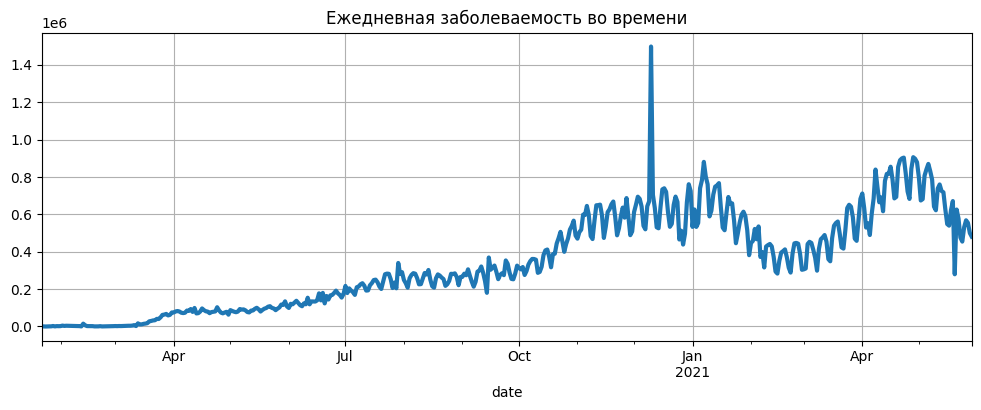

In [49]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
)

<Axes: title={'center': 'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

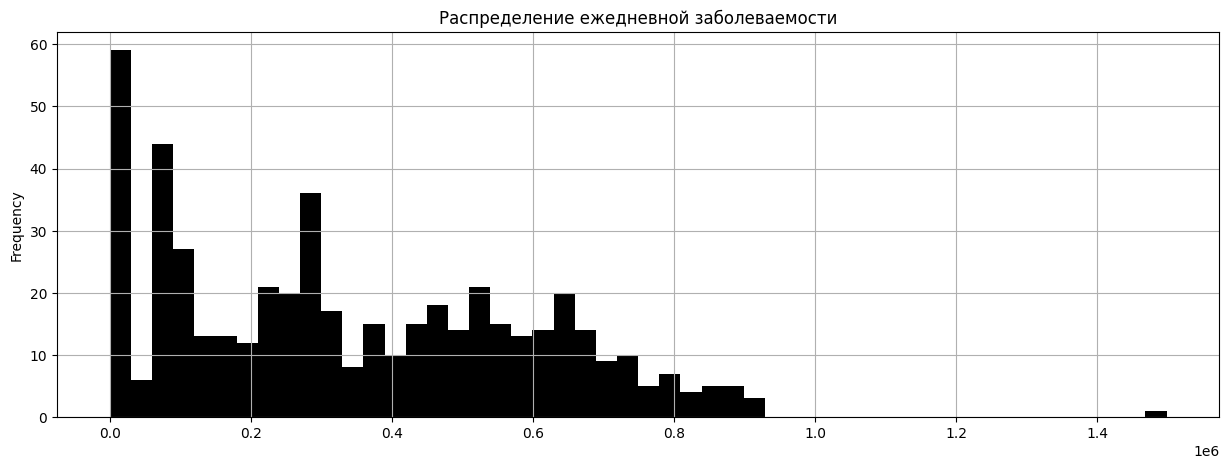

In [50]:
grouped_cases.plot(
    kind='hist',
    figsize=(15, 5),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=50
)

<Axes: title={'center': 'ТОП-10 стран по заболеваемости'}, xlabel='country'>

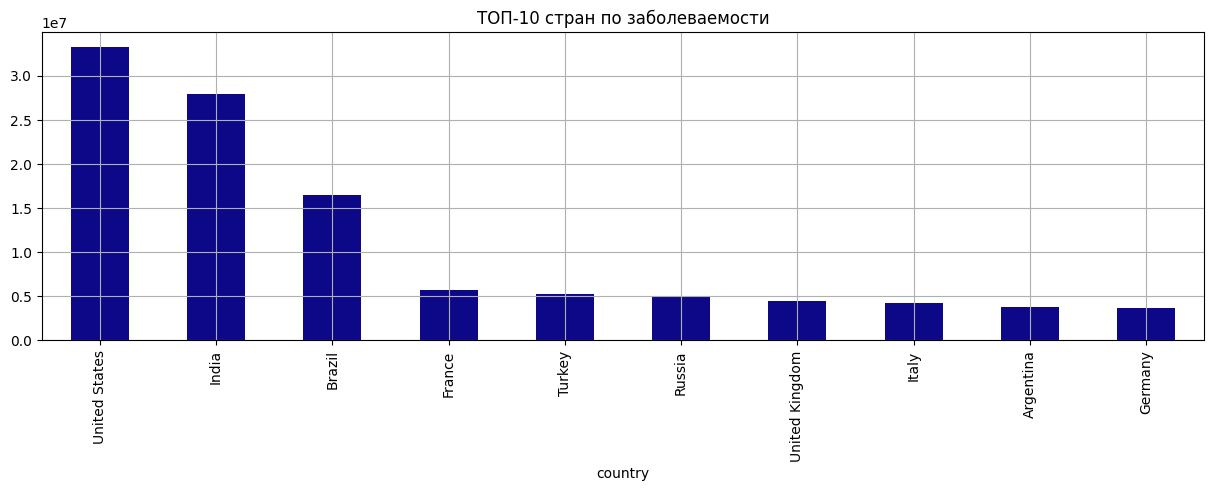

In [64]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(15, 4),
    title='ТОП-10 стран по заболеваемости',
    colormap='plasma'
)

<Axes: title={'center': 'Заболеваемость и смертность'}, xlabel='country'>

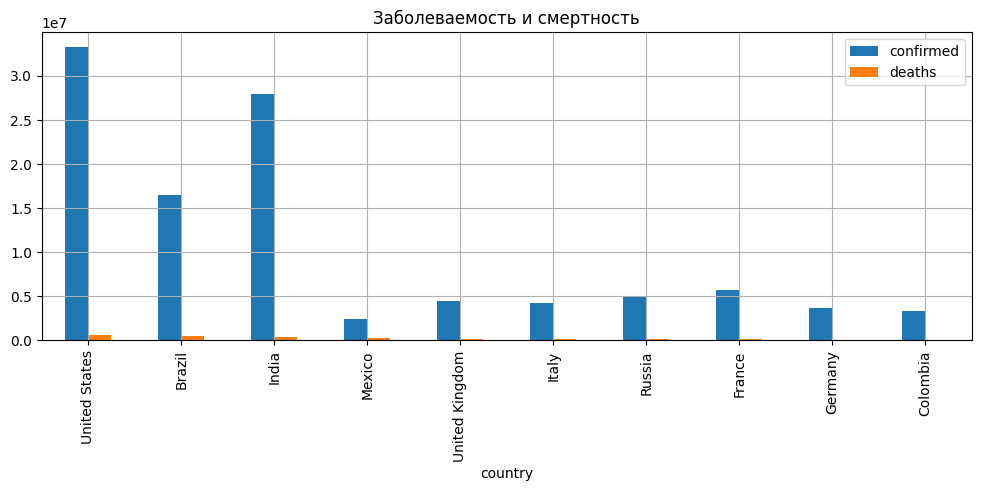

In [69]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(kind='bar', grid=True, figsize=(12, 4), title='Заболеваемость и смертность')

<Axes: xlabel='country'>

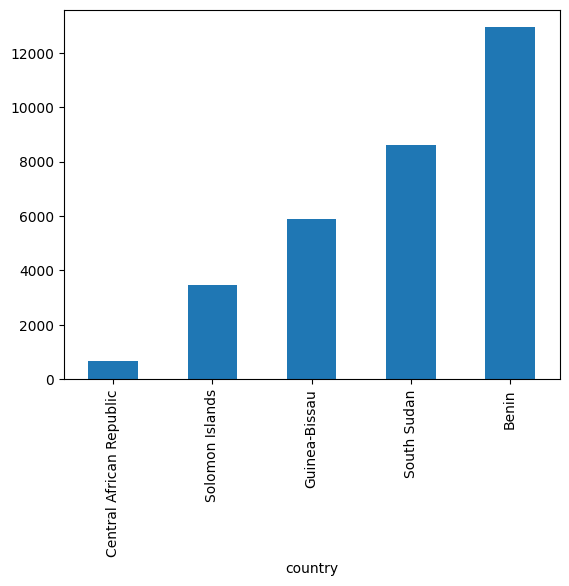

In [71]:
#Задание 4.5

display(covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar'));